In [80]:
import math
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib.ticker as mtick
import statsmodels.api as sm
from scipy import stats
import xlrd
from datetime import datetime, date
import re
import matplotlib.ticker as mtick
from plotnine import *


In [81]:
from google.colab import data_table
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
s = pd.read_csv('/content/drive/MyDrive/QVI/QVI_t2_data.csv')
s

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018/10/17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018/9/16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019/3/7,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019/3/8,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018/11/2,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018/12/8,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018/10/1,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018/10/24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018/10/27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [83]:
# Convert 'DATE' column to datetime
s['DATE'] = pd.to_datetime(s['DATE'])

# Create a month ID
s['YEARMONTH'] = s['DATE'].dt.year * 100 + s['DATE'].dt.month
s

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEARMONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream,201812
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,201810
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget,201810
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget,201810


In [84]:
# Define the measure calculations
measureOverTime = s.groupby(['STORE_NBR', 'YEARMONTH']).agg(
    totSales=('TOT_SALES', 'sum'),
    nCustomers=('LYLTY_CARD_NBR', 'nunique'),
    nTxn=('TXN_ID', 'nunique'),
    nChips=('PROD_QTY', 'sum'),
    totPrice=('TOT_SALES', 'sum'),
).reset_index()

# Calculate additional measures
measureOverTime['nTxnPerCust'] = measureOverTime['nTxn'] / measureOverTime['nCustomers']
measureOverTime['nChipsPerTxn'] = measureOverTime['nChips'] / measureOverTime['nTxn']
measureOverTime['avgPricePerUnit'] = measureOverTime['totPrice'] / measureOverTime['nChips']

measureOverTime = measureOverTime.sort_values(by=['STORE_NBR', 'YEARMONTH'])

print(measureOverTime)


      STORE_NBR  YEARMONTH  totSales  nCustomers  nTxn  nChips  totPrice  \
0             1     201807     206.9          49    52      62     206.9   
1             1     201808     176.1          42    43      54     176.1   
2             1     201809     278.8          59    62      75     278.8   
3             1     201810     188.1          44    45      58     188.1   
4             1     201811     192.6          46    47      57     192.6   
...         ...        ...       ...         ...   ...     ...       ...   
3164        272     201902     395.5          45    48      91     395.5   
3165        272     201903     442.3          50    53     101     442.3   
3166        272     201904     445.1          54    55     105     445.1   
3167        272     201905     314.6          34    40      71     314.6   
3168        272     201906     312.1          34    37      70     312.1   

      nTxnPerCust  nChipsPerTxn  avgPricePerUnit  
0        1.061224      1.192308     

In [85]:
# Find stores with all 12 months

storesWithFullObs = measureOverTime['STORE_NBR'].value_counts()
storesWithFullObs = storesWithFullObs[storesWithFullObs == 12].index.tolist()

# Filter pre-trial measures
preTrialMeasures = measureOverTime[(measureOverTime['YEARMONTH'] < 201902) & (measureOverTime['STORE_NBR'].isin(storesWithFullObs))]

preTrialMeasures.head(20)

,STORE_NBR,YEARMONTH,totSales,nCustomers,nTxn,nChips,totPrice,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.90,49,52,62,206.90,1.061224,1.192308,3.337097
1,1,201808,176.10,42,43,54,176.10,1.023810,1.255814,3.261111
2,1,201809,278.80,59,62,75,278.80,1.050847,1.209677,3.717333
3,1,201810,188.10,44,45,58,188.10,1.022727,1.288889,3.243103
4,1,201811,192.60,46,47,57,192.60,1.021739,1.212766,3.378947
5,1,201812,189.60,42,47,57,189.60,1.119048,1.212766,3.326316
6,1,201901,154.80,35,36,42,154.80,1.028571,1.166667,3.685714
12,2,201807,150.80,39,41,46,150.80,1.051282,1.121951,3.278261
13,2,201808,193.80,39,43,55,193.80,1.102564,1.279070,3.523636
14,2,201809,154.40,36,37,41,154.40,1.027778,1.108108,3.765854


In [86]:
# Define a function to calculate correlations
def calculate_correlation(inputTable, metric_col, store_comparison):
    calc_corr_table = pd.DataFrame(columns=['Store1', 'Store2', 'corr_measure'])
    store_numbers = inputTable['STORE_NBR'].unique()

    for store in store_numbers:
        calculated_measure = pd.DataFrame({'Store1': [store_comparison],
                                           'Store2': [store],
                                           'corr_measure': np.corrcoef(inputTable.loc[inputTable['STORE_NBR'] == store_comparison, metric_col], inputTable.loc[preTrialMeasures['STORE_NBR'] == store, metric_col])[0, 1]})
        calc_corr_table = pd.concat([calc_corr_table, calculated_measure], ignore_index=True)

    return calc_corr_table


# Call the function to calculate correlations
#correlation_table = calculate_correlation(inputTable, metric_column, trial_store)
#print(correlation_table)


In [87]:
# Define a function to calculate standardized magnitude distance
def calculate_magnitude_distance(inputTable, metric_col, store_comparison):
    calc_dist_table = pd.DataFrame(columns=['Store1', 'Store2', 'YEARMONTH', 'measure'])
    store_numbers = inputTable['STORE_NBR'].unique()

    calculated_measures = []
    for store in store_numbers:
        calculated_measure = {
            'Store1': store_comparison,
            'Store2': store,
            'YEARMONTH': inputTable[inputTable['STORE_NBR'] == store_comparison]['YEARMONTH'].values[0],
            'measure': np.abs(inputTable[inputTable['STORE_NBR'] == store_comparison][metric_col].values[0] -
                           inputTable[inputTable['STORE_NBR'] == store][metric_col].values[0])}
        calculated_measures.append(calculated_measure)
        calc_dist_table = pd.DataFrame(calculated_measures)


    minMaxDist = calc_dist_table.groupby(['Store1', 'YEARMONTH'])[['measure']].agg(['min', 'max']).reset_index()
    minMaxDist.columns = ['Store1', 'YEARMONTH', 'minDist', 'maxDist']

    distTable = pd.merge(calc_dist_table, minMaxDist, on=['Store1', 'YEARMONTH'])

    distTable['magnitudeMeasure'] = 1 - (distTable['measure'] - distTable['minDist']) / (distTable['maxDist'] - distTable['minDist'])

    finalDistTable = distTable.groupby(['Store1', 'Store2'])[['magnitudeMeasure']].mean().reset_index()
    finalDistTable.rename(columns={'magnitudeMeasure': 'mag_measure'}, inplace=True)

    return finalDistTable

# Call the function with your inputTable DataFrame and other parameters
# table = calculate_magnitude_distance(preTrialMeasures, 'totSales', trial_store)



In [88]:
# Use the functions for calculating correlation
trial_store = 77
corr_nSales = calculate_correlation(preTrialMeasures, 'totSales', trial_store)
corr_nCustomers = calculate_correlation(preTrialMeasures, 'nCustomers', trial_store)

# Use the functions for calculating magnitude
magnitude_nSales = calculate_magnitude_distance(preTrialMeasures, 'totSales', trial_store)
magnitude_nCustomers = calculate_magnitude_distance(preTrialMeasures, 'nCustomers', trial_store)

print ('corr_nSales:')
print (corr_nSales)
print ('corr_nCustomers:')
print(corr_nCustomers)
print ('magnitude_nSales:')
print (magnitude_nSales)
print ('magnitude_nCustomers:')
print (magnitude_nCustomers)

corr_nSales:
    Store1 Store2  corr_measure
0       77      1      0.075218
1       77      2     -0.263079
2       77      3      0.806644
3       77      4     -0.263300
4       77      5     -0.110652
..     ...    ...           ...
255     77    268      0.344757
256     77    269     -0.315730
257     77    270      0.315430
258     77    271      0.355487
259     77    272      0.117622

[260 rows x 3 columns]
corr_nCustomers:
    Store1 Store2  corr_measure
0       77      1      0.322168
1       77      2     -0.572051
2       77      3      0.834207
3       77      4     -0.295639
4       77      5      0.370659
..     ...    ...           ...
255     77    268      0.369517
256     77    269     -0.474293
257     77    270     -0.131259
258     77    271      0.019629
259     77    272      0.223217

[260 rows x 3 columns]
magnitude_nSales:
     Store1  Store2  mag_measure
0        77       1     0.932426
1        77       2     0.890259
2        77       3     0.316822
3   

In [89]:
# Assuming you have the correlation and magnitude distance results stored in corr_nSales, magnitude_nSales, corr_nCustomers, and magnitude_nCustomers DataFrames

# Define the correlation weight
corr_weight = 0.5

# Merge correlation and magnitude results for total sales
score_nSales = pd.merge(corr_nSales, magnitude_nSales, on=['Store1', 'Store2'])
score_nSales['scoreNSales'] = score_nSales['corr_measure'] * corr_weight + score_nSales['mag_measure'] * (1 - corr_weight)


# Merge correlation and magnitude results for number of customers
score_nCustomers = pd.merge(corr_nCustomers, magnitude_nCustomers, on=['Store1', 'Store2'])
score_nCustomers['scoreNCust'] = score_nCustomers['corr_measure'] * corr_weight + score_nCustomers['mag_measure'] * (1 - corr_weight)

print("Combined Scores for Total Sales:")
print(score_nSales)

print("Combined Scores for Number of Customers:")
print(score_nCustomers)


Combined Scores for Total Sales:
    Store1 Store2  corr_measure  mag_measure  scoreNSales
0       77      1      0.075218     0.932426     0.503822
1       77      2     -0.263079     0.890259     0.313590
2       77      3      0.806644     0.316822     0.561733
3       77      4     -0.263300     0.170851    -0.046224
4       77      5     -0.110652     0.612748     0.251048
..     ...    ...           ...          ...          ...
255     77    268      0.344757     0.945280     0.645018
256     77    269     -0.315730     0.484967     0.084618
257     77    270      0.315430     0.499399     0.407415
258     77    271      0.355487     0.504059     0.429773
259     77    272      0.117622     0.897550     0.507586

[260 rows x 5 columns]
Combined Scores for Number of Customers:
    Store1 Store2  corr_measure  mag_measure  scoreNCust
0       77      1      0.322168     0.978947    0.650558
1       77      2     -0.572051     0.873684    0.150817
2       77      3      0.834207    

In [90]:
# Assuming you have the score_nSales and score_nCustomers DataFrames

# Merge scores for total sales and number of customers
score_Control = pd.merge(score_nSales, score_nCustomers, on=['Store1', 'Store2'])

# Calculate the final control score
score_Control['finalControlScore'] = score_Control['scoreNSales'] * 0.5 + score_Control['scoreNCust'] * 0.5

print("Combined Control Scores:")
print(score_Control)


Combined Control Scores:
    Store1 Store2  corr_measure_x  mag_measure_x  scoreNSales  corr_measure_y  \
0       77      1        0.075218       0.932426     0.503822        0.322168   
1       77      2       -0.263079       0.890259     0.313590       -0.572051   
2       77      3        0.806644       0.316822     0.561733        0.834207   
3       77      4       -0.263300       0.170851    -0.046224       -0.295639   
4       77      5       -0.110652       0.612748     0.251048        0.370659   
..     ...    ...             ...            ...          ...             ...   
255     77    268        0.344757       0.945280     0.645018        0.369517   
256     77    269       -0.315730       0.484967     0.084618       -0.474293   
257     77    270        0.315430       0.499399     0.407415       -0.131259   
258     77    271        0.355487       0.504059     0.429773        0.019629   
259     77    272        0.117622       0.897550     0.507586        0.223217   

  

In [91]:
# Select control store for trial store 77
trial_store = 77
control_store = None
filtered_scores = score_Control[score_Control['Store1'] == trial_store].sort_values(by='finalControlScore', ascending=False)

if len(filtered_scores) > 1:
    control_store = filtered_scores.iloc[1]['Store2']
else:
    print("Not enough data to select a control store.")

print(control_store)

233


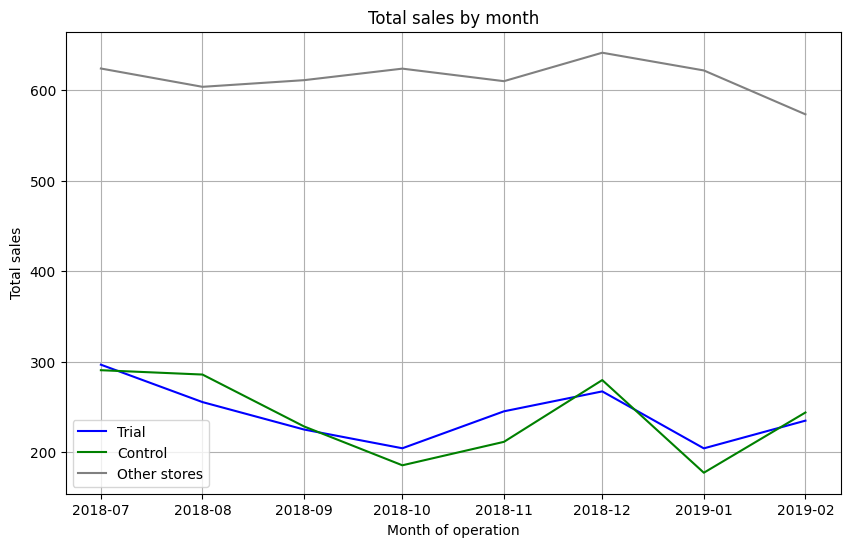

In [92]:
# Create a copy of measureOverTime for sales visualization
measureOverTimeSales = measureOverTime.copy()

# Create a new column 'Store_type' based on trial and control store
measureOverTimeSales['Store_type'] = measureOverTimeSales['STORE_NBR'].apply(
    lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores')
)

# Calculate mean total sales by YearMonth and Store_type
pastSales = measureOverTimeSales.groupby(['YEARMONTH', 'Store_type']).agg({'totSales': 'mean'}).reset_index()

# Convert YEARMONTH to TransactionMonth
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'].astype(str), format='%Y%m')

# Filter data for months before 201903
pastSales = pastSales[pastSales['YEARMONTH'] < 201903]

# Plot the trends using matplotlib
plt.figure(figsize=(10, 6))
for store_type, color in [('Trial', 'blue'), ('Control', 'green'), ('Other stores', 'gray')]:
    plt.plot(pastSales[pastSales['Store_type'] == store_type]['TransactionMonth'],
             pastSales[pastSales['Store_type'] == store_type]['totSales'],
             label=store_type,
             color=color)

plt.xlabel("Month of operation")
plt.ylabel("Total sales")
plt.title("Total sales by month")
plt.legend()
plt.grid(True)
plt.show()


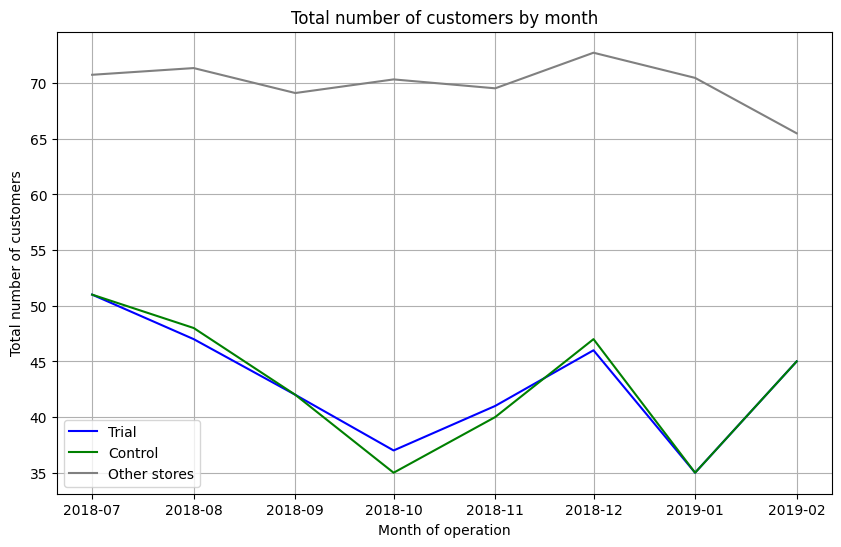

In [93]:
# Create a copy of measureOverTime for number of customers visualization
measureOverTimeCusts = measureOverTime.copy()

# Create a new column 'Store_type' based on trial and control store
measureOverTimeCusts['Store_type'] = measureOverTimeCusts['STORE_NBR'].apply(
    lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores'))

# Calculate mean number of customers by YearMonth and Store_type
pastCustomers = measureOverTimeCusts.groupby(['YEARMONTH', 'Store_type']).agg({'nCustomers': 'mean'}).reset_index()

# Convert YEARMONTH to TransactionMonth
pastCustomers['TransactionMonth'] = pd.to_datetime(pastCustomers['YEARMONTH'].astype(str), format='%Y%m')

# Filter data for months before 201903
pastCustomers = pastCustomers[pastCustomers['YEARMONTH'] < 201903]

# Plot the trends using matplotlib
plt.figure(figsize=(10, 6))
for store_type, color in [('Trial', 'blue'), ('Control', 'green'), ('Other stores', 'gray')]:
    plt.plot(pastCustomers[pastCustomers['Store_type'] == store_type]['TransactionMonth'],
             pastCustomers[pastCustomers['Store_type'] == store_type]['nCustomers'],
             label=store_type,
             color=color)

plt.xlabel("Month of operation")
plt.ylabel("Total number of customers")
plt.title("Total number of customers by month")
plt.legend()
plt.grid(True)
plt.show()


In [94]:
# Calculate the scaling factor for control sales
scalingFactorForControlSales = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == trial_store) &
                                                 (preTrialMeasures['YEARMONTH'] < 201902)]['totSales'].sum() / \
                               preTrialMeasures[(preTrialMeasures['STORE_NBR'] == control_store) &
                                                (preTrialMeasures['YEARMONTH'] < 201902)]['totSales'].sum()

# Create a copy of measureOverTime for sales scaling
measureOverTimeSales = measureOverTime.copy()

# Calculate scaled control sales
scaledControlSales = measureOverTimeSales[(measureOverTimeSales['STORE_NBR'] == control_store)].copy()
scaledControlSales['controlSales'] = scaledControlSales['totSales'] * scalingFactorForControlSales

print("Scaling Factor for Control Sales:", scalingFactorForControlSales)
print("Scaled Control Sales:")
print(scaledControlSales)


Scaling Factor for Control Sales: 1.023617303289553
Scaled Control Sales:
      STORE_NBR  YEARMONTH  totSales  nCustomers  nTxn  nChips  totPrice  \
2699        233     201807     290.7          51    54      88     290.7   
2700        233     201808     285.9          48    50      80     285.9   
2701        233     201809     228.6          42    45      70     228.6   
2702        233     201810     185.7          35    36      56     185.7   
2703        233     201811     211.6          40    41      62     211.6   
2704        233     201812     279.8          47    50      75     279.8   
2705        233     201901     177.5          35    35      47     177.5   
2706        233     201902     244.0          45    47      70     244.0   
2707        233     201903     199.1          40    41      59     199.1   
2708        233     201904     158.6          30    32      46     158.6   
2709        233     201905     344.4          57    62      92     344.4   
2710        23

In [95]:
# Merge scaled control sales and trial sales by YEARMONTH
percentageDiff = pd.merge(scaledControlSales[['YEARMONTH', 'controlSales']],
                          measureOverTime[measureOverTime['STORE_NBR'] == trial_store][['YEARMONTH', 'totSales']],
                          on='YEARMONTH')

# Calculate the percentage difference
percentageDiff['percentageDiff'] = abs(percentageDiff['controlSales'] - percentageDiff['totSales']) / percentageDiff['controlSales']

print("Percentage Difference:")
print(percentageDiff)


Percentage Difference:
    YEARMONTH  controlSales  totSales  percentageDiff
0      201807    297.565550     296.8        0.002573
1      201808    292.652187     255.5        0.126950
2      201809    233.998916     225.2        0.037602
3      201810    190.085733     204.5        0.075830
4      201811    216.597421     245.3        0.132516
5      201812    286.408121     267.3        0.066716
6      201901    181.692071     204.4        0.124980
7      201902    249.762622     235.0        0.059107
8      201903    203.802205     278.5        0.366521
9      201904    162.345704     263.5        0.623080
10     201905    352.533799     299.3        0.151003
11     201906    226.219424     264.7        0.170103


In [96]:
# Calculate the standard deviation of the scaled percentage difference in the pre-trial period
stdDev = np.std(percentageDiff[percentageDiff['YEARMONTH'] < 201902]['percentageDiff'])

# Define the degrees of freedom (number of values that are free to vary)
# In this case, there are 8 months in the pre-trial period, hence the degrees of freedom is 8 - 1 = 7.
degreesOfFreedom = 7

# Calculate the t-value for each month (Test wuth a null hypothesis of there being 0 diff between trial and control stores during the trial period)
percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev

# Convert YEARMONTH to TransactionMonth
percentageDiff['TransactionMonth'] = pd.to_datetime(percentageDiff['YEARMONTH'].astype(str), format='%Y%m')

# Filter data for months between 201901 and 201905
tTestResults = percentageDiff[(percentageDiff['YEARMONTH'] > 201901) & (percentageDiff['YEARMONTH'] < 201905)][['TransactionMonth', 'tValue']]

print("T-Test Results:")
print(tTestResults)


T-Test Results:
  TransactionMonth     tValue
7       2019-02-01   1.278363
8       2019-03-01   7.927151
9       2019-04-01  13.476023


In [97]:
from scipy.stats import t
#Assuming you have the 'degreesOfFreedom' value
# Assuming tTestResults is a valid distribution object
# Find the 95th percentile of the t distribution
percentile_95 = t.ppf(0.95, degreesOfFreedom)

print("95th Percentile of the t-distribution:", percentile_95)


95th Percentile of the t-distribution: 1.894578605061305


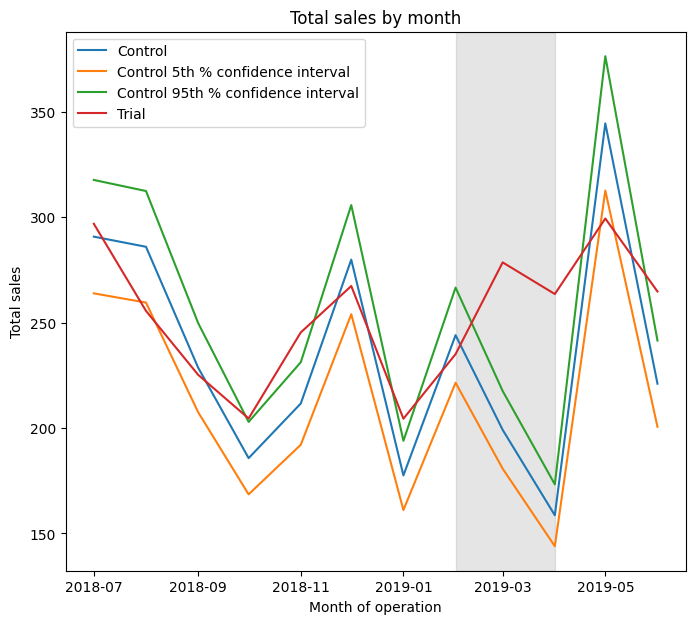

In [98]:
from matplotlib.patches import Rectangle

# Create a copy of measureOverTime for sales visualization
measureOverTimeSales = measureOverTime.copy()

# Create a new column 'Store_type' based on trial and control store
measureOverTimeSales['Store_type'] = np.where(measureOverTimeSales['STORE_NBR'] == trial_store, 'Trial',
                                    np.where(measureOverTimeSales['STORE_NBR'] == control_store, 'Control', 'Other stores'))

# Calculate mean total sales by YearMonth and Store_type
pastSales = measureOverTimeSales.groupby(['YEARMONTH', 'Store_type']).agg({'totSales': 'mean'}).reset_index()

# Convert YEARMONTH to TransactionMonth
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'].astype(str), format='%Y%m')

# Filter data for Trial and Control stores
pastSales = pastSales[pastSales['Store_type'].isin(['Trial', 'Control'])]

# Create confidence interval bounds for Control stores
pastSales_Controls95 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls95['totSales'] = pastSales_Controls95['totSales'] * (1 + stdDev * 2)
pastSales_Controls95['Store_type'] = 'Control 95th % confidence interval'

pastSales_Controls5 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls5['totSales'] = pastSales_Controls5['totSales'] * (1 - stdDev * 2)
pastSales_Controls5['Store_type'] = 'Control 5th % confidence interval'

# Combine assessment results
trialAssessment = pd.concat([pastSales, pastSales_Controls95, pastSales_Controls5], ignore_index=True)

# Filtering data for the geom_rect
filtered_data = trialAssessment[(trialAssessment['YEARMONTH'] < 201905) & (trialAssessment['YEARMONTH'] > 201901)]

plt.figure(figsize=(8, 7))  # Adjust the figure size if needed

# geom_rect
# Create rectangles for confidence intervals
plt.axvspan(
    filtered_data['TransactionMonth'].min(),filtered_data['TransactionMonth'].max(),
    ymin=0,ymax=1,color='gray', alpha=0.2,label=None)

# geom_line
for store_type, group in trialAssessment.groupby('Store_type'):
    plt.plot(group['TransactionMonth'], group['totSales'], label=store_type)

# Adding labels and title
plt.xlabel("Month of operation")
plt.ylabel("Total sales")
plt.title("Total sales by month")
plt.legend()

# Show the plot
plt.show()


In [99]:
# Calculate the scaling factor for control sales
scalingFactorForControlCustomers = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == trial_store) &
                                                 (preTrialMeasures['YEARMONTH'] < 201902)]['nCustomers'].sum() / \
                               preTrialMeasures[(preTrialMeasures['STORE_NBR'] == control_store) &
                                                (preTrialMeasures['YEARMONTH'] < 201902)]['nCustomers'].sum()

# Create a copy of measureOverTime for sales scaling
measureOverTimeCustomers = measureOverTime.copy()

# Calculate scaled control sales
scaledControlCustomers = measureOverTimeCustomers[(measureOverTimeCustomers['STORE_NBR'] == control_store)].copy()

scaledControlCustomers['controlCustomers'] = scaledControlCustomers['nCustomers'] * scalingFactorForControlCustomers

print("Scaling Factor for Control Customers:", scalingFactorForControlCustomers)
print("Scaled Control Customers:")
print(scaledControlCustomers)

Scaling Factor for Control Customers: 1.0033557046979866
Scaled Control Customers:
      STORE_NBR  YEARMONTH  totSales  nCustomers  nTxn  nChips  totPrice  \
2699        233     201807     290.7          51    54      88     290.7   
2700        233     201808     285.9          48    50      80     285.9   
2701        233     201809     228.6          42    45      70     228.6   
2702        233     201810     185.7          35    36      56     185.7   
2703        233     201811     211.6          40    41      62     211.6   
2704        233     201812     279.8          47    50      75     279.8   
2705        233     201901     177.5          35    35      47     177.5   
2706        233     201902     244.0          45    47      70     244.0   
2707        233     201903     199.1          40    41      59     199.1   
2708        233     201904     158.6          30    32      46     158.6   
2709        233     201905     344.4          57    62      92     344.4   
2710 

In [100]:
# Merge scaled control sales and trial sales by YEARMONTH
percentageDiffCustomers = pd.merge(scaledControlCustomers[['YEARMONTH', 'controlCustomers']],
                          measureOverTime[measureOverTime['STORE_NBR'] == trial_store][['YEARMONTH', 'nCustomers']],
                          on='YEARMONTH')

# Calculate the percentage difference
percentageDiffCustomers['percentageDiff'] = abs(percentageDiffCustomers['controlCustomers'] - percentageDiffCustomers['nCustomers']) / percentageDiffCustomers['controlCustomers']

print("Percentage Difference Customers:")
print(percentageDiffCustomers)



Percentage Difference Customers:
    YEARMONTH  controlCustomers  nCustomers  percentageDiff
0      201807         51.171141          51        0.003344
1      201808         48.161074          47        0.024108
2      201809         42.140940          42        0.003344
3      201810         35.117450          37        0.053607
4      201811         40.134228          41        0.021572
5      201812         47.157718          46        0.024550
6      201901         35.117450          35        0.003344
7      201902         45.151007          45        0.003344
8      201903         40.134228          50        0.245819
9      201904         30.100671          47        0.561427
10     201905         57.191275          55        0.038315
11     201906         41.137584          41        0.003344


In [101]:
# Calculate the standard deviation of the scaled percentage difference in the pre-trial period
stdDevCust = np.std(percentageDiffCustomers[percentageDiffCustomers['YEARMONTH'] < 201902]['percentageDiff'])

# Calculate the degrees of freedom
degreesOfFreedom = 7

# Calculate the t-value for each month
percentageDiffCustomers['tValue'] = (percentageDiffCustomers['percentageDiff'] - 0) / stdDevCust

# Convert YEARMONTH to TransactionMonth
percentageDiffCustomers['TransactionMonth'] = pd.to_datetime(percentageDiffCustomers['YEARMONTH'].astype(str), format='%Y%m')

# Filter data for months between 201901 and 201905
tTestResultsCustomers = percentageDiffCustomers[(percentageDiffCustomers['YEARMONTH'] > 201901) & (percentageDiffCustomers['YEARMONTH'] < 201905)][['TransactionMonth', 'tValue']]

print("T-Test Results Customers:")
print(tTestResultsCustomers)


T-Test Results Customers:
  TransactionMonth     tValue
7       2019-02-01   0.198043
8       2019-03-01  14.556162
9       2019-04-01  33.244822


In [102]:
# Find the 95th percentile of the t distribution
percentile_95 = t.ppf(0.95, degreesOfFreedom)

print("95th Percentile of the t-distribution:", percentile_95)

95th Percentile of the t-distribution: 1.894578605061305


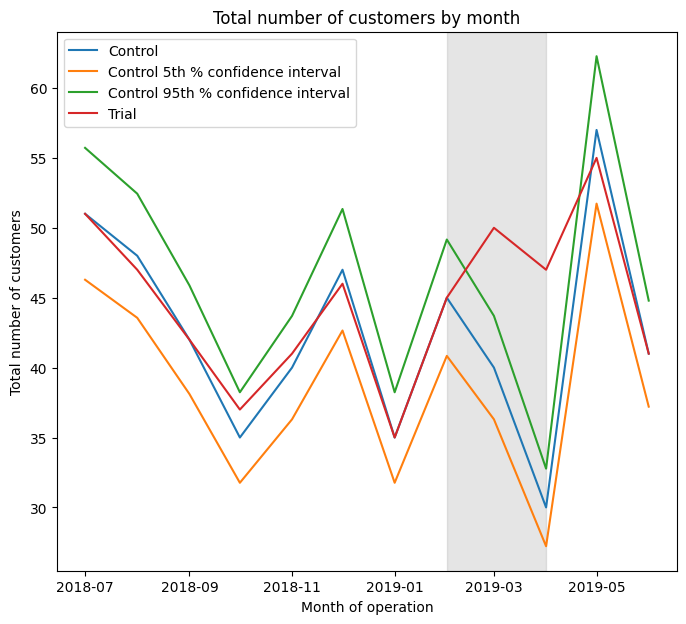

In [103]:
# Create a copy of measureOverTime for sales visualization
measureOverTimeCustomers = measureOverTime.copy()

# Create a new column 'Store_type' based on trial and control store
measureOverTimeCustomers['Store_type'] = np.where(measureOverTimeCustomers['STORE_NBR'] == trial_store, 'Trial',
                                    np.where(measureOverTimeCustomers['STORE_NBR'] == control_store, 'Control', 'Other stores'))

# Calculate mean total sales by YearMonth and Store_type
pastCustomers = measureOverTimeCustomers.groupby(['YEARMONTH', 'Store_type']).agg({'nCustomers': 'mean'}).reset_index()

# Convert YEARMONTH to TransactionMonth
pastCustomers['TransactionMonth'] = pd.to_datetime(pastCustomers['YEARMONTH'].astype(str), format='%Y%m')

# Filter data for Trial and Control stores
pastCustomers = pastCustomers[pastCustomers['Store_type'].isin(['Trial', 'Control'])]

# Create confidence interval bounds for Control stores
pastCustomers_Controls95 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls95['nCustomers'] = pastCustomers_Controls95['nCustomers'] * (1 + stdDev * 2)
pastCustomers_Controls95['Store_type'] = 'Control 95th % confidence interval'

pastCustomers_Controls5 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls5['nCustomers'] = pastCustomers_Controls5['nCustomers'] * (1 - stdDev * 2)
pastCustomers_Controls5['Store_type'] = 'Control 5th % confidence interval'

# Combine assessment results
trialAssessmentCustomers = pd.concat([pastCustomers, pastCustomers_Controls95, pastCustomers_Controls5], ignore_index=True)

# Filtering data for the geom_rect
filtered_data_Customers = trialAssessmentCustomers[(trialAssessmentCustomers['YEARMONTH'] < 201905) & (trialAssessmentCustomers['YEARMONTH'] > 201901)]

plt.figure(figsize=(8, 7))  # Adjust the figure size if needed

# geom_rect
# Create rectangles for confidence intervals
plt.axvspan(
    filtered_data_Customers['TransactionMonth'].min(),filtered_data_Customers['TransactionMonth'].max(),
    ymin=0,ymax=1,color='gray', alpha=0.2,label=None)

# geom_line
for store_type, group in trialAssessmentCustomers.groupby('Store_type'):
    plt.plot(group['TransactionMonth'], group['nCustomers'], label=store_type)

# Adding labels and title
plt.xlabel("Month of operation")
plt.ylabel("Total number of customers")
plt.title("Total number of customers by month")
plt.legend()

# Show the plot
plt.show()



In [130]:
# TRIAL STORE 86
trial_store = 86

# Calculate correlations
corr_nSales_86 = calculate_correlation(preTrialMeasures, 'totSales', trial_store)
corr_nCustomers_86 = calculate_correlation(preTrialMeasures, 'nCustomers', trial_store)

# Calculate magnitudes
magnitude_nSales_86 = calculate_magnitude_distance(preTrialMeasures, 'totSales', trial_store)
magnitude_nCustomers_86 = calculate_magnitude_distance(preTrialMeasures, 'nCustomers', trial_store)

print("corr_nSales_86:")
print(corr_nSales_86)
print("corr_nCustomers_86:")
print(corr_nCustomers_86)
print("magnitude_nCustomers_86:")
print(magnitude_nCustomers_86)

corr_nSales_86:
    Store1 Store2  corr_measure
0       86      1      0.445632
1       86      2     -0.403835
2       86      3     -0.261284
3       86      4     -0.039035
4       86      5      0.235159
..     ...    ...           ...
255     86    268     -0.452182
256     86    269      0.697055
257     86    270     -0.730679
258     86    271      0.527637
259     86    272      0.004926

[260 rows x 3 columns]
corr_nCustomers_86:
    Store1 Store2  corr_measure
0       86      1      0.485831
1       86      2     -0.086161
2       86      3     -0.353786
3       86      4     -0.169608
4       86      5     -0.253229
..     ...    ...           ...
255     86    268     -0.034273
256     86    269     -0.098587
257     86    270     -0.767267
258     86    271      0.267393
259     86    272     -0.353815

[260 rows x 3 columns]
magnitude_nCustomers_86:
     Store1  Store2  mag_measure
0        86       1     0.484536
1        86       2     0.381443
2        86       3     

In [105]:
# Define correlation weight
corr_weight = 0.5

# Merge correlation and magnitude results and calculate combined scores
score_nSales_86 = pd.merge(corr_nSales_86, magnitude_nSales_86, on=['Store1', 'Store2'])
score_nSales_86['scoreNSales'] = score_nSales_86['corr_measure'] * corr_weight + score_nSales_86['mag_measure'] * (1 - corr_weight)

score_nCustomers_86 = pd.merge(corr_nCustomers_86, magnitude_nCustomers_86, on=['Store1', 'Store2'])
score_nCustomers_86['scoreNCust'] = score_nCustomers_86['corr_measure'] * corr_weight + score_nCustomers_86['mag_measure'] * (1 - corr_weight)

# Combine scores across the drivers
score_Control_86 = pd.merge(score_nSales_86, score_nCustomers_86, on=['Store1', 'Store2'])
score_Control_86['finalControlScore'] = score_Control_86['scoreNSales'] * 0.5 + score_Control_86['scoreNCust'] * 0.5

# Select control store based on the highest matching store
control_store_86 = score_Control_86[score_Control_86['Store1'] == trial_store].sort_values(by='finalControlScore', ascending=False)['Store2'].iloc[1]

print(control_store_86)


155


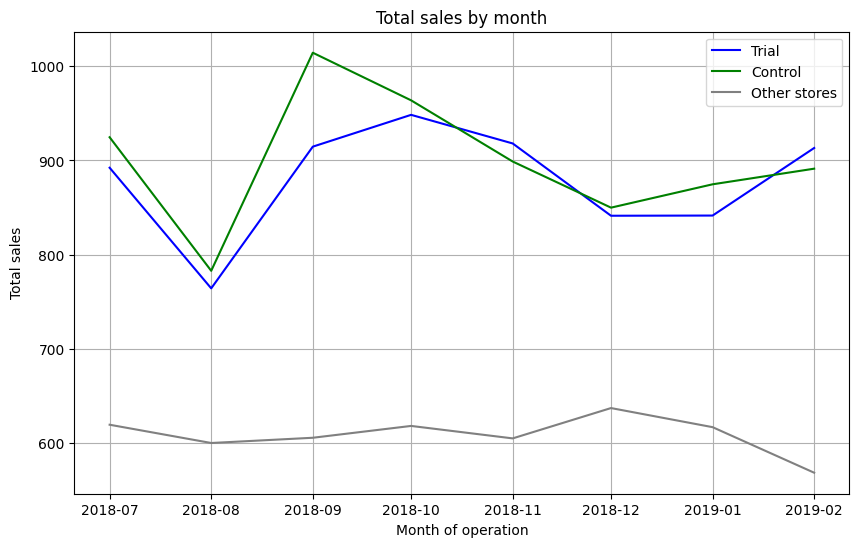

In [106]:
# Create a copy of measureOverTime for sales visualization
measureOverTimeSales_86 = measureOverTime.copy()

# Create a new column 'Store_type' based on trial and control store
measureOverTimeSales_86['Store_type'] = measureOverTimeSales_86['STORE_NBR'].apply(
    lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store_86 else 'Other stores'))

# Calculate mean total sales by YearMonth and Store_type
pastSales_86 = measureOverTimeSales_86.groupby(['YEARMONTH', 'Store_type']).agg({'totSales': 'mean'}).reset_index()

# Convert YEARMONTH to TransactionMonth
pastSales_86['TransactionMonth'] = pd.to_datetime(pastSales_86['YEARMONTH'].astype(str), format='%Y%m')

# Filter data for months before 201903
pastSales_86 = pastSales_86[pastSales_86['YEARMONTH'] < 201903]

# Plot the trends using matplotlib
plt.figure(figsize=(10, 6))
for store_type, color in [('Trial', 'blue'), ('Control', 'green'), ('Other stores', 'gray')]:
    plt.plot(pastSales_86[pastSales_86['Store_type'] == store_type]['TransactionMonth'],
             pastSales_86[pastSales_86['Store_type'] == store_type]['totSales'],
             label=store_type,
             color=color)

plt.xlabel("Month of operation")
plt.ylabel("Total sales")
plt.title("Total sales by month")
plt.legend()
plt.grid(True)
plt.show()


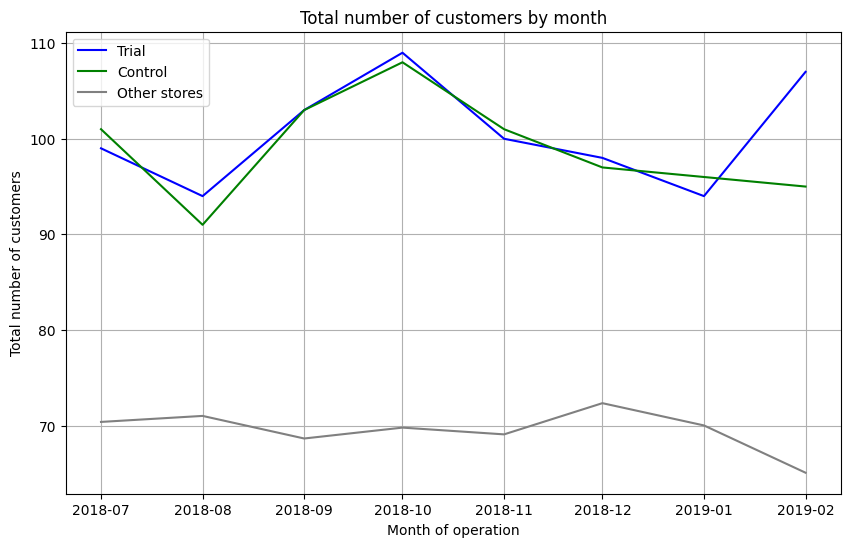

In [107]:
# Create a copy of measureOverTime for customers visualization
measureOverTimeCusts_86 = measureOverTime.copy()

# Create a new column 'Store_type' based on trial and control store
measureOverTimeCusts_86['Store_type'] = measureOverTimeCusts_86['STORE_NBR'].apply(
    lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store_86 else 'Other stores'))

# Calculate mean number of customers by YearMonth and Store_type
pastCustomers_86 = measureOverTimeCusts_86.groupby(['YEARMONTH', 'Store_type']).agg({'nCustomers': 'mean'}).reset_index()

# Convert YEARMONTH to TransactionMonth
pastCustomers_86['TransactionMonth'] = pd.to_datetime(pastCustomers_86['YEARMONTH'].astype(str), format='%Y%m')

# Filter data for months before 201903
pastCustomers_86 = pastCustomers_86[pastCustomers_86['YEARMONTH'] < 201903]

# Plot the trends using matplotlib
plt.figure(figsize=(10, 6))
for store_type, color in [('Trial', 'blue'), ('Control', 'green'), ('Other stores', 'gray')]:
    plt.plot(pastCustomers_86[pastCustomers_86['Store_type'] == store_type]['TransactionMonth'],
             pastCustomers_86[pastCustomers_86['Store_type'] == store_type]['nCustomers'],
             label=store_type,
             color=color)

plt.xlabel("Month of operation")
plt.ylabel("Total number of customers")
plt.title("Total number of customers by month")
plt.legend()
plt.grid(True)
plt.show()



In [132]:
# Calculate the scaling factor for control sales
scalingFactorForControlSales_86 = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == trial_store) &
                                                 (preTrialMeasures['YEARMONTH'] < 201902)]['totSales'].sum() / \
                               preTrialMeasures[(preTrialMeasures['STORE_NBR'] == control_store_86) &
                                                (preTrialMeasures['YEARMONTH'] < 201902)]['totSales'].sum()

# Create a copy of measureOverTime for sales scaling
measureOverTimeSales_86 = measureOverTime.copy()

# Calculate scaled control sales
scaledControlSales_86 = measureOverTimeSales_86[(measureOverTimeSales_86['STORE_NBR'] == control_store_86)].copy()
scaledControlSales_86['controlSales'] = scaledControlSales_86['totSales'] * scalingFactorForControlSales_86

print("Scaling Factor for Control Sales 86:", scalingFactorForControlSales_86)
print("Scaled Control Sales:")
print(scaledControlSales_86)

Scaling Factor for Control Sales 86: 0.9700651481287743
Scaled Control Sales:
      STORE_NBR  YEARMONTH  totSales  nCustomers  nTxn  nChips  totPrice  \
1793        155     201807    924.60         101   123     250    924.60   
1794        155     201808    782.70          91   119     229    782.70   
1795        155     201809   1014.40         103   144     290   1014.40   
1796        155     201810    963.80         108   136     272    963.80   
1797        155     201811    898.80         101   133     270    898.80   
1798        155     201812    849.80          97   120     242    849.80   
1799        155     201901    874.60          96   125     252    874.60   
1800        155     201902    891.20          95   125     254    891.20   
1801        155     201903    804.40          94   118     240    804.40   
1802        155     201904    844.60          99   120     242    844.60   
1803        155     201905    922.85         106   136     265    922.85   
1804      

In [133]:
# Assuming you have the necessary scaledControlSales and measureOverTime DataFrames

# Merge scaled control sales and trial sales by YEARMONTH
percentageDiff_86 = pd.merge(scaledControlSales_86[['YEARMONTH', 'controlSales']],
                          measureOverTime[measureOverTime['STORE_NBR'] == trial_store][['YEARMONTH', 'totSales']],
                          on='YEARMONTH')

# Calculate the percentage difference
percentageDiff_86['percentageDiff'] = abs(percentageDiff_86['controlSales'] - percentageDiff_86['totSales']) / percentageDiff_86['controlSales']

print("Percentage Difference 86:")
print(percentageDiff_86)

Percentage Difference 86:
    YEARMONTH  controlSales  totSales  percentageDiff
0      201807    896.922236    892.20        0.005265
1      201808    759.269991    764.05        0.006296
2      201809    984.034086    914.60        0.070561
3      201810    934.948790    948.40        0.014387
4      201811    871.894555    918.00        0.052880
5      201812    824.361363    841.20        0.020426
6      201901    848.418979    841.40        0.008273
7      201902    864.522060    913.20        0.056306
8      201903    780.320405   1026.80        0.315870
9      201904    819.317024    848.20        0.035253
10     201905    895.224622    889.30        0.006618
11     201906    831.539845    838.00        0.007769


In [134]:
# Calculate the standard deviation of the scaled percentage difference in the pre-trial period
stdDev_86 = np.std(percentageDiff_86[percentageDiff_86['YEARMONTH'] < 201902]['percentageDiff'])

# Calculate the degrees of freedom
degreesOfFreedom = 7

# Calculate the t-value for each month
percentageDiff_86['tValue'] = (percentageDiff_86['percentageDiff'] - 0) / stdDev_86

# Convert YEARMONTH to TransactionMonth
percentageDiff_86['TransactionMonth'] = pd.to_datetime(percentageDiff_86['YEARMONTH'].astype(str), format='%Y%m')

# Filter data for months between 201901 and 201905
tTestResults_86 = percentageDiff_86[(percentageDiff_86['YEARMONTH'] > 201901) & (percentageDiff_86['YEARMONTH'] < 201905)][['TransactionMonth', 'tValue']]

print("T-Test Results 86:")
print(tTestResults_86)


T-Test Results 86:
  TransactionMonth     tValue
7       2019-02-01   2.354174
8       2019-03-01  13.206585
9       2019-04-01   1.473915


In [135]:
# Find the 95th percentile of the t distribution
percentile_95 = t.ppf(0.95, degreesOfFreedom)

print("95th Percentile of the t-distribution:", percentile_95)

95th Percentile of the t-distribution: 1.894578605061305


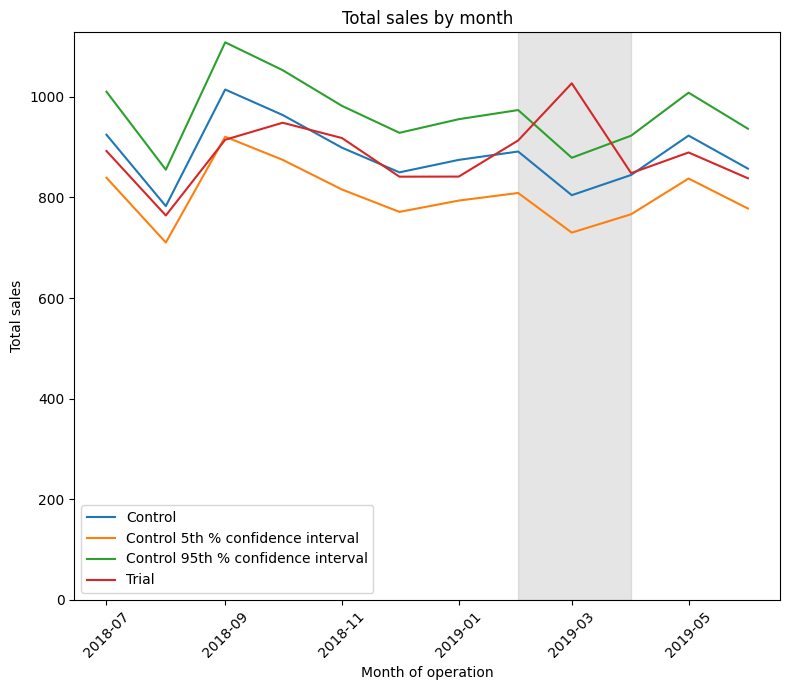

In [136]:
# Create a copy of measureOverTime for sales visualization
measureOverTimeSales_86 = measureOverTime.copy()

# Create a new column 'Store_type' based on trial and control store
measureOverTimeSales_86['Store_type'] = np.where(measureOverTimeSales_86['STORE_NBR'] == trial_store, 'Trial',
                                    np.where(measureOverTimeSales_86['STORE_NBR'] == control_store_86, 'Control', 'Other stores'))

# Calculate mean total sales by YearMonth and Store_type
pastSales_86 = measureOverTimeSales_86.groupby(['YEARMONTH', 'Store_type']).agg({'totSales': 'mean'}).reset_index()

# Convert YEARMONTH to TransactionMonth
pastSales_86['TransactionMonth'] = pd.to_datetime(pastSales_86['YEARMONTH'].astype(str), format='%Y%m')

# Filter data for Trial and Control stores
pastSales_86 = pastSales_86[pastSales_86['Store_type'].isin(['Trial', 'Control'])]

# Create confidence interval bounds for Control stores
pastSales_Controls95_86 = pastSales_86[pastSales_86['Store_type'] == 'Control'].copy()
pastSales_Controls95_86['totSales'] = pastSales_Controls95_86['totSales'] * (1 + stdDev * 2)
pastSales_Controls95_86['Store_type'] = 'Control 95th % confidence interval'

pastSales_Controls5_86 = pastSales_86[pastSales_86['Store_type'] == 'Control'].copy()
pastSales_Controls5_86['totSales'] = pastSales_Controls5_86['totSales'] * (1 - stdDev * 2)
pastSales_Controls5_86['Store_type'] = 'Control 5th % confidence interval'

# Combine assessment results
trialAssessment_86 = pd.concat([pastSales_86, pastSales_Controls95_86, pastSales_Controls5_86], ignore_index=True)

# Filtering data for the geom_rect
filtered_data_86 = trialAssessment_86[(trialAssessment_86['YEARMONTH'] < 201905) & (trialAssessment_86['YEARMONTH'] > 201901)]

plt.figure(figsize=(8, 7))  # Adjust the figure size if needed

# geom_rect
# Create rectangles for confidence intervals
plt.axvspan(
    filtered_data_86['TransactionMonth'].min(),filtered_data_86['TransactionMonth'].max(),
    ymin=0,ymax=1,color='gray', alpha=0.2,label=None)

# geom_line
for store_type, group in trialAssessment_86.groupby('Store_type'):
    plt.plot(group['TransactionMonth'], group['totSales'], label=store_type)

# Adding labels and title
plt.xlabel("Month of operation")
plt.ylabel("Total sales")
plt.title("Total sales by month")
plt.legend()
plt.xticks(rotation=45)
plt.ylim(0)  # Set y-axis minimum to 0
plt.tight_layout()

# Show the plot
plt.show()



In [137]:
# Calculate the scaling factor for control customers
scalingFactorForControlCustomers_86 = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == trial_store) &
                                                 (preTrialMeasures['YEARMONTH'] < 201902)]['nCustomers'].sum() / \
                               preTrialMeasures[(preTrialMeasures['STORE_NBR'] == control_store) &
                                                (preTrialMeasures['YEARMONTH'] < 201902)]['nCustomers'].sum()

# Create a copy of measureOverTime for sales scaling
measureOverTimeCustomers_86 = measureOverTime.copy()

# Calculate scaled control sales
scaledControlCustomers_86 = measureOverTimeCustomers_86[(measureOverTimeCustomers_86['STORE_NBR'] == control_store)].copy()
scaledControlCustomers_86['controlCustomers'] = scaledControlCustomers_86['nCustomers'] * scalingFactorForControlCustomers_86

print("Scaling Factor for Control Customers 86:", scalingFactorForControlCustomers_86)
print("Scaled Control Customers 86:")
print(scaledControlCustomers_86)

Scaling Factor for Control Customers 86: 2.338926174496644
Scaled Control Customers 86:
      STORE_NBR  YEARMONTH  totSales  nCustomers  nTxn  nChips  totPrice  \
2699        233     201807     290.7          51    54      88     290.7   
2700        233     201808     285.9          48    50      80     285.9   
2701        233     201809     228.6          42    45      70     228.6   
2702        233     201810     185.7          35    36      56     185.7   
2703        233     201811     211.6          40    41      62     211.6   
2704        233     201812     279.8          47    50      75     279.8   
2705        233     201901     177.5          35    35      47     177.5   
2706        233     201902     244.0          45    47      70     244.0   
2707        233     201903     199.1          40    41      59     199.1   
2708        233     201904     158.6          30    32      46     158.6   
2709        233     201905     344.4          57    62      92     344.4   


In [138]:
# Merge scaled control sales and trial sales by YEARMONTH
percentageDiffCustomers_86 = pd.merge(scaledControlCustomers_86[['YEARMONTH', 'controlCustomers']],
                          measureOverTime[measureOverTime['STORE_NBR'] == trial_store][['YEARMONTH', 'nCustomers']],
                          on='YEARMONTH')

# Calculate the percentage difference
percentageDiffCustomers_86['percentageDiff'] = abs(percentageDiffCustomers_86['controlCustomers'] - percentageDiffCustomers_86['nCustomers']) / \
                                               percentageDiffCustomers_86['controlCustomers']

print("Percentage Difference Customers 86:")
print(percentageDiffCustomers_86)

Percentage Difference Customers 86:
    YEARMONTH  controlCustomers  nCustomers  percentageDiff
0      201807        119.285235          99        0.170057
1      201808        112.268456          94        0.162721
2      201809         98.234899         103        0.048507
3      201810         81.862416         109        0.331502
4      201811         93.557047         100        0.068867
5      201812        109.929530          98        0.108520
6      201901         81.862416          94        0.148268
7      201902        105.251678         107        0.016611
8      201903         93.557047         115        0.229197
9      201904         70.167785         105        0.496413
10     201905        133.318792         104        0.219915
11     201906         95.895973          98        0.021941


In [139]:
# Calculate the standard deviation of the scaled percentage difference in the pre-trial period
stdDev_customers_86 = np.std(percentageDiffCustomers_86[percentageDiffCustomers_86['YEARMONTH'] < 201902]['percentageDiff'])

# Calculate the degrees of freedom
degreesOfFreedom = 7

# Calculate the t-value for each month
percentageDiffCustomers_86['tValue'] = (percentageDiffCustomers_86['percentageDiff'] - 0) / stdDev_customers_86

# Convert YEARMONTH to TransactionMonth
percentageDiffCustomers_86['TransactionMonth'] = pd.to_datetime(percentageDiffCustomers_86['YEARMONTH'].astype(str), format='%Y%m')

# Filter data for months between 201901 and 201905
tTestResultsCustomers_86 = percentageDiffCustomers_86[(percentageDiffCustomers_86['YEARMONTH'] > 201901) & (percentageDiffCustomers_86['YEARMONTH'] < 201905)][['TransactionMonth', 'tValue']]

print("T-Test Results Customers 86:")
print(tTestResultsCustomers_86)


T-Test Results Customers 86:
  TransactionMonth    tValue
7       2019-02-01  0.192550
8       2019-03-01  2.656798
9       2019-04-01  5.754316


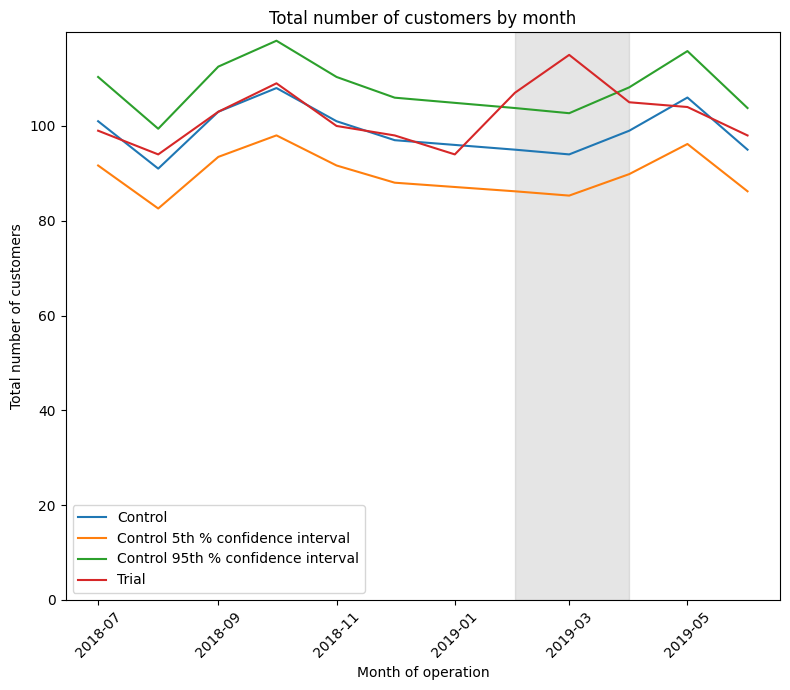

In [140]:
# Create a copy of measureOverTime for sales visualization
measureOverTimeCustomers_86 = measureOverTime.copy()

# Create a new column 'Store_type' based on trial and control store
measureOverTimeCustomers_86['Store_type'] = np.where(measureOverTimeCustomers_86['STORE_NBR'] == trial_store, 'Trial',
                                    np.where(measureOverTimeCustomers_86['STORE_NBR'] == control_store_86, 'Control', 'Other stores'))

# Calculate mean total sales by YearMonth and Store_type
pastCustomers_86 = measureOverTimeCustomers_86.groupby(['YEARMONTH', 'Store_type']).agg({'nCustomers': 'mean'}).reset_index()

# Convert YEARMONTH to TransactionMonth
pastCustomers_86['TransactionMonth'] = pd.to_datetime(pastCustomers_86['YEARMONTH'].astype(str), format='%Y%m')

# Filter data for Trial and Control stores
pastCustomers_86 = pastCustomers_86[pastCustomers_86['Store_type'].isin(['Trial', 'Control'])]

# Create confidence interval bounds for Control stores
pastCustomers_Controls95_86 = pastCustomers_86[pastCustomers_86['Store_type'] == 'Control'].copy()
pastCustomers_Controls95_86['nCustomers'] = pastCustomers_Controls95_86['nCustomers'] * (1 + stdDev * 2)
pastCustomers_Controls95_86['Store_type'] = 'Control 95th % confidence interval'

pastCustomers_Controls5_86 = pastCustomers_86[pastCustomers_86['Store_type'] == 'Control'].copy()
pastCustomers_Controls5_86['nCustomers'] = pastCustomers_Controls5_86['nCustomers'] * (1 - stdDev * 2)
pastCustomers_Controls5_86['Store_type'] = 'Control 5th % confidence interval'

# Combine assessment results
trialAssessmentCustomers_86 = pd.concat([pastCustomers_86, pastCustomers_Controls95_86, pastCustomers_Controls5_86], ignore_index=True)

# Filtering data for the geom_rect
filtered_data_Customers_86 = trialAssessmentCustomers_86[(trialAssessmentCustomers_86['YEARMONTH'] < 201905) & (trialAssessmentCustomers_86['YEARMONTH'] > 201901)]

plt.figure(figsize=(8, 7))  # Adjust the figure size if needed

# geom_rect
# Create rectangles for confidence intervals
plt.axvspan(
    filtered_data_Customers_86['TransactionMonth'].min(),filtered_data_Customers_86['TransactionMonth'].max(),
    ymin=0,ymax=1,color='gray', alpha=0.2,label=None)

# geom_line
for store_type, group in trialAssessmentCustomers_86.groupby('Store_type'):
    plt.plot(group['TransactionMonth'], group['nCustomers'], label=store_type)

# Adding labels and title
plt.xlabel("Month of operation")
plt.ylabel("Total number of customers")
plt.title("Total number of customers by month")
plt.legend()
plt.xticks(rotation=45)
plt.ylim(0)  # Set y-axis minimum to 0
plt.tight_layout()

# Show the plot
plt.show()



In [141]:
# TRIAL STORE 88
# Use the functions for calculating correlation
trial_store = 88
corr_nSales_88 = calculate_correlation(preTrialMeasures, 'totSales', trial_store)
corr_nCustomers_88 = calculate_correlation(preTrialMeasures, 'nCustomers', trial_store)

# Use the functions for calculating magnitude
magnitude_nSales_88 = calculate_magnitude_distance(preTrialMeasures, 'totSales', trial_store)
magnitude_nCustomers_88 = calculate_magnitude_distance(preTrialMeasures, 'nCustomers', trial_store)


In [170]:
# Define the correlation weight
corr_weight = 0.5

# Merge correlation and magnitude results for total sales
score_nSales_88 = pd.merge(corr_nSales_88, magnitude_nSales_88, on=['Store1', 'Store2'])
score_nSales_88['scoreNSales'] = score_nSales_88['corr_measure'] * corr_weight + score_nSales_88['mag_measure'] * (1 - corr_weight)


# Merge correlation and magnitude results for number of customers
score_nCustomers_88 = pd.merge(corr_nCustomers_88, magnitude_nCustomers_88, on=['Store1', 'Store2'])
score_nCustomers_88['scoreNCust'] = score_nCustomers_88['corr_measure'] * corr_weight + score_nCustomers_88['mag_measure'] * (1 - corr_weight)


# Combine scores across the drivers
score_Control_88 = pd.merge(score_nSales_88, score_nCustomers_88, on=['Store1', 'Store2'])
score_Control_88['finalControlScore'] = score_Control_88['scoreNSales'] * 0.5 + score_Control_88['scoreNCust'] * 0.5

# Select control store based on the highest matching store
control_store_88 = score_Control_88[score_Control_88['Store1'] == trial_store].sort_values(by='finalControlScore', ascending=False)['Store2'].iloc[1]

print(control_store_88)



178


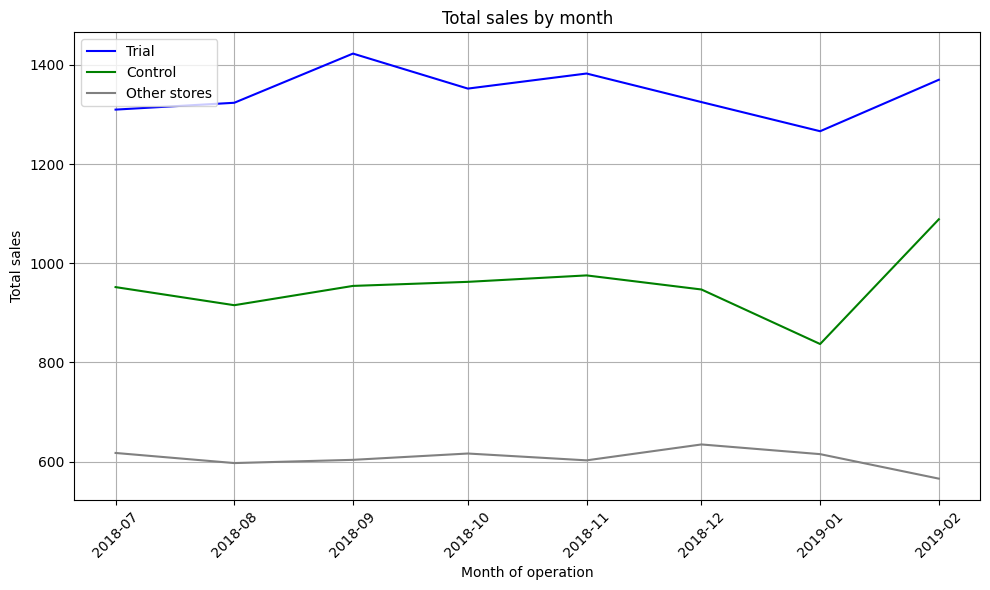

In [171]:
# Create a copy of measureOverTime for sales visualization
measureOverTimeSales_88 = measureOverTime.copy()

# Create a new column 'Store_type' based on trial and control store
measureOverTimeSales_88['Store_type'] = measureOverTimeSales_88['STORE_NBR'].apply(
    lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store_88 else 'Other stores')
)

# Calculate mean total sales by YearMonth and Store_type
pastSales_88 = measureOverTimeSales_88.groupby(['YEARMONTH', 'Store_type']).agg({'totSales': 'mean'}).reset_index()

# Convert YEARMONTH to TransactionMonth
pastSales_88['TransactionMonth'] = pd.to_datetime(pastSales_88['YEARMONTH'].astype(str), format='%Y%m')

# Filter data for months before 201903
pastSales_88 = pastSales_88[pastSales_88['YEARMONTH'] < 201903]

# Plot the trends using matplotlib
plt.figure(figsize=(10, 6))
for store_type, color in [('Trial', 'blue'), ('Control', 'green'), ('Other stores', 'gray')]:
    plt.plot(pastSales_88[pastSales_88['Store_type'] == store_type]['TransactionMonth'],
             pastSales_88[pastSales_88['Store_type'] == store_type]['totSales'],
             label=store_type,
             color=color)

plt.xlabel("Month of operation")
plt.ylabel("Total sales")
plt.title("Total sales by month")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)

# Show the plot
plt.show()


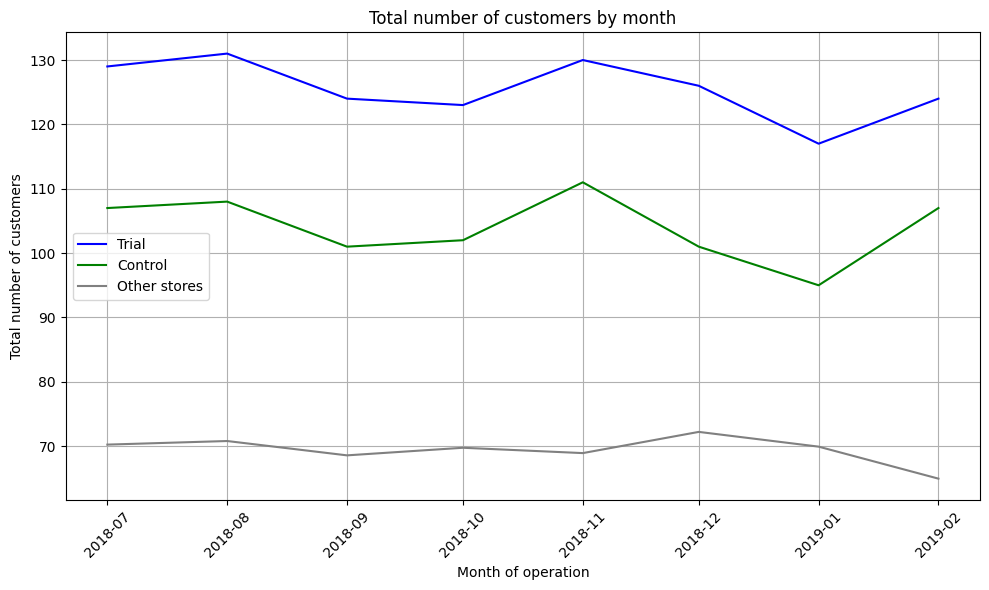

In [172]:
# Create a copy of measureOverTime for customers visualization
measureOverTimeCusts_88 = measureOverTime.copy()

# Create a new column 'Store_type' based on trial and control store
measureOverTimeCusts_88['Store_type'] = measureOverTimeCusts_88['STORE_NBR'].apply(
    lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store_88 else 'Other stores')
)

# Calculate mean number of customers by YearMonth and Store_type
pastCustomers_88 = measureOverTimeCusts_88.groupby(['YEARMONTH', 'Store_type']).agg({'nCustomers': 'mean'}).reset_index()

# Convert YEARMONTH to TransactionMonth
pastCustomers_88['TransactionMonth'] = pd.to_datetime(pastCustomers_88['YEARMONTH'].astype(str), format='%Y%m')

# Filter data for months before 201903
pastCustomers_88 = pastCustomers_88[pastCustomers_88['YEARMONTH'] < 201903]

# Plot the trends using matplotlib
plt.figure(figsize=(10, 6))
for store_type, color in [('Trial', 'blue'), ('Control', 'green'), ('Other stores', 'gray')]:
    plt.plot(pastCustomers_88[pastCustomers_88['Store_type'] == store_type]['TransactionMonth'],
             pastCustomers_88[pastCustomers_88['Store_type'] == store_type]['nCustomers'],
             label=store_type,
             color=color)

plt.xlabel("Month of operation")
plt.ylabel("Total number of customers")
plt.title("Total number of customers by month")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.grid(True)
plt.show()


In [173]:
# Calculate the scaling factor for control sales
scalingFactorForControlSales_88 = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == trial_store) &
                                                 (preTrialMeasures['YEARMONTH'] < 201902)]['totSales'].sum() / \
                               preTrialMeasures[(preTrialMeasures['STORE_NBR'] == control_store_88) &
                                                (preTrialMeasures['YEARMONTH'] < 201902)]['totSales'].sum()

# Create a copy of measureOverTime for sales scaling
measureOverTimeSales_88 = measureOverTime.copy()

# Calculate scaled control sales
scaledControlSales_88 = measureOverTimeSales_88[(measureOverTimeSales_88['STORE_NBR'] == control_store_88)].copy()
scaledControlSales_88['controlSales'] = scaledControlSales_88['totSales'] * scalingFactorForControlSales_88

print("Scaling Factor for Control Sales 88:", scalingFactorForControlSales_88)
print("Scaled Control Sales 88:")
print(scaledControlSales_88)

Scaling Factor for Control Sales 88: 1.4338146535258616
Scaled Control Sales 88:
      STORE_NBR  YEARMONTH  totSales  nCustomers  nTxn  nChips  totPrice  \
2069        178     201807     952.0         107   131     264     952.0   
2070        178     201808     915.5         108   133     253     915.5   
2071        178     201809     954.4         101   128     266     954.4   
2072        178     201810     962.6         102   141     290     962.6   
2073        178     201811     975.6         111   138     278     975.6   
2074        178     201812     947.2         101   134     270     947.2   
2075        178     201901     837.2          95   118     244     837.2   
2076        178     201902    1088.8         107   145     294    1088.8   
2077        178     201903     998.8         114   143     286     998.8   
2078        178     201904    1059.8         117   148     300    1059.8   
2079        178     201905     888.0         102   131     250     888.0   
2080   

In [174]:
# Merge scaled control sales and trial sales by YEARMONTH
percentageDiff_88 = pd.merge(scaledControlSales_88[['YEARMONTH', 'controlSales']],
                          measureOverTime[measureOverTime['STORE_NBR'] == trial_store][['YEARMONTH', 'totSales']],
                          on='YEARMONTH')

# Calculate the percentage difference
percentageDiff_88['percentageDiff'] = abs(percentageDiff_88['controlSales'] - percentageDiff_88['totSales']) / percentageDiff_88['controlSales']

print("Percentage Difference 88:")
print(percentageDiff_88)


Percentage Difference 88:
    YEARMONTH  controlSales  totSales  percentageDiff
0      201807   1364.991550   1310.00        0.040287
1      201808   1312.657315   1323.80        0.008489
2      201809   1368.432705   1423.00        0.039876
3      201810   1380.189985   1352.40        0.020135
4      201811   1398.829576   1382.80        0.011459
5      201812   1358.109240   1325.20        0.024232
6      201901   1200.389628   1266.40        0.054991
7      201902   1561.137395   1370.20        0.122307
8      201903   1432.094076   1477.20        0.031496
9      201904   1519.556770   1439.40        0.052750
10     201905   1273.227412   1308.25        0.027507
11     201906   1036.074469   1354.60        0.307435


In [175]:
# Calculate the standard deviation of the scaled percentage difference in the pre-trial period
stdDev_88 = np.std(percentageDiff_88[percentageDiff_88['YEARMONTH'] < 201902]['percentageDiff'])

# Calculate the degrees of freedom
degreesOfFreedom = 7

# Calculate the t-value for each month
percentageDiff_88['tValue'] = (percentageDiff_88['percentageDiff'] - 0) / stdDev_88

# Convert YEARMONTH to TransactionMonth
percentageDiff_88['TransactionMonth'] = pd.to_datetime(percentageDiff_88['YEARMONTH'].astype(str), format='%Y%m')

# Filter data for months between 201901 and 201905
tTestResults_88 = percentageDiff_88[(percentageDiff_88['YEARMONTH'] > 201901) & (percentageDiff_88['YEARMONTH'] < 201905)][['TransactionMonth', 'tValue']]

print("T-Test Results 88:")
print(tTestResults_88)

T-Test Results 88:
  TransactionMonth    tValue
7       2019-02-01  7.737251
8       2019-03-01  1.992502
9       2019-04-01  3.337030


In [176]:
# Find the 95th percentile of the t distribution
percentile_95 = t.ppf(0.95, degreesOfFreedom)

print("95th Percentile of the t-distribution:", percentile_95)


95th Percentile of the t-distribution: 1.894578605061305


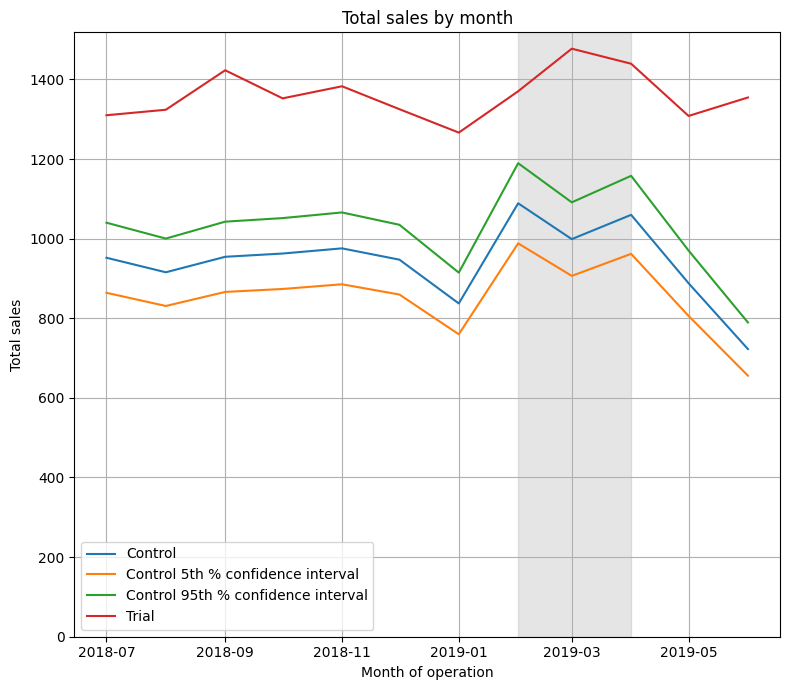

In [177]:
# Create a copy of measureOverTime for sales visualization
measureOverTimeSales_88 = measureOverTime.copy()

# Create a new column 'Store_type' based on trial and control store
measureOverTimeSales_88['Store_type'] = np.where(measureOverTimeSales_88['STORE_NBR'] == trial_store, 'Trial',
                                    np.where(measureOverTimeSales_88['STORE_NBR'] == control_store_88, 'Control', 'Other stores'))

# Calculate mean total sales by YearMonth and Store_type
pastSales_88 = measureOverTimeSales_88.groupby(['YEARMONTH', 'Store_type']).agg({'totSales': 'mean'}).reset_index()

# Convert YEARMONTH to TransactionMonth
pastSales_88['TransactionMonth'] = pd.to_datetime(pastSales_88['YEARMONTH'].astype(str), format='%Y%m')

# Filter data for Trial and Control stores
pastSales_88 = pastSales_88[pastSales_88['Store_type'].isin(['Trial', 'Control'])]

# Create confidence interval bounds for Control stores
pastSales_Controls95_88 = pastSales_88[pastSales_88['Store_type'] == 'Control'].copy()
pastSales_Controls95_88['totSales'] = pastSales_Controls95_88['totSales'] * (1 + stdDev * 2)
pastSales_Controls95_88['Store_type'] = 'Control 95th % confidence interval'

pastSales_Controls5_88 = pastSales_88[pastSales_88['Store_type'] == 'Control'].copy()
pastSales_Controls5_88['totSales'] = pastSales_Controls5_88['totSales'] * (1 - stdDev * 2)
pastSales_Controls5_88['Store_type'] = 'Control 5th % confidence interval'

# Combine assessment results
trialAssessment_88 = pd.concat([pastSales_88, pastSales_Controls95_88, pastSales_Controls5_88], ignore_index=True)

# Filtering data for the geom_rect
filtered_data_88 = trialAssessment_88[(trialAssessment_88['YEARMONTH'] < 201905) & (trialAssessment_88['YEARMONTH'] > 201901)]

plt.figure(figsize=(8, 7))  # Adjust the figure size if needed

# geom_rect
# Create rectangles for confidence intervals
plt.axvspan(
    filtered_data_88['TransactionMonth'].min(),filtered_data_88['TransactionMonth'].max(),
    ymin=0,ymax=1,color='gray', alpha=0.2,label=None)

# geom_line
for store_type, group in trialAssessment_88.groupby('Store_type'):
    plt.plot(group['TransactionMonth'], group['totSales'], label=store_type)

# Adding labels and title
plt.xlabel("Month of operation")
plt.ylabel("Total sales")
plt.title("Total sales by month")
plt.legend()
plt.ylim(0)  # Set y-axis minimum to 0
plt.tight_layout()
plt.grid(True)

# Show the plot
plt.show()


In [178]:
# Calculate the scaling factor for control customers
scalingFactorForControlCustomers_88 = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == trial_store) &
                                                 (preTrialMeasures['YEARMONTH'] < 201902)]['nCustomers'].sum() / \
                               preTrialMeasures[(preTrialMeasures['STORE_NBR'] == control_store_88) &
                                                (preTrialMeasures['YEARMONTH'] < 201902)]['nCustomers'].sum()

# Create a copy of measureOverTime for sales scaling
measureOverTimeCustomers_88 = measureOverTime.copy()

# Calculate scaled control sales
scaledControlCustomers_88 = measureOverTimeCustomers_88[(measureOverTimeCustomers_88['STORE_NBR'] == control_store_88)].copy()
scaledControlCustomers_88['controlCustomers'] = scaledControlCustomers_88['nCustomers'] * scalingFactorForControlCustomers_88

print("Scaling Factor for Control Customers 88:", scalingFactorForControlCustomers_88)
print("Scaled Control Customers 88:")
print(scaledControlCustomers_88)

Scaling Factor for Control Customers 88: 1.2137931034482758
Scaled Control Customers 88:
      STORE_NBR  YEARMONTH  totSales  nCustomers  nTxn  nChips  totPrice  \
2069        178     201807     952.0         107   131     264     952.0   
2070        178     201808     915.5         108   133     253     915.5   
2071        178     201809     954.4         101   128     266     954.4   
2072        178     201810     962.6         102   141     290     962.6   
2073        178     201811     975.6         111   138     278     975.6   
2074        178     201812     947.2         101   134     270     947.2   
2075        178     201901     837.2          95   118     244     837.2   
2076        178     201902    1088.8         107   145     294    1088.8   
2077        178     201903     998.8         114   143     286     998.8   
2078        178     201904    1059.8         117   148     300    1059.8   
2079        178     201905     888.0         102   131     250     888.0   

In [179]:
# Merge scaled control sales and trial sales by YEARMONTH
percentageDiffCustomers_88 = pd.merge(scaledControlCustomers_88[['YEARMONTH', 'controlCustomers']],
                          measureOverTime[measureOverTime['STORE_NBR'] == trial_store][['YEARMONTH', 'nCustomers']],
                          on='YEARMONTH')

# Calculate the percentage difference
percentageDiffCustomers_88['percentageDiff'] = abs(percentageDiffCustomers_88['controlCustomers'] - percentageDiffCustomers_88['nCustomers']) / \
                                               percentageDiffCustomers_88['controlCustomers']

print("Percentage Difference Customers 88:")
print(percentageDiffCustomers_88)

Percentage Difference Customers 88:
    YEARMONTH  controlCustomers  nCustomers  percentageDiff
0      201807        129.875862         129        0.006744
1      201808        131.089655         131        0.000684
2      201809        122.593103         124        0.011476
3      201810        123.806897         123        0.006517
4      201811        134.731034         130        0.035115
5      201812        122.593103         126        0.027790
6      201901        115.310345         117        0.014653
7      201902        129.875862         124        0.045242
8      201903        138.372414         134        0.031599
9      201904        142.013793         128        0.098679
10     201905        123.806897         128        0.033868
11     201906        111.668966         121        0.083560


In [180]:
# Calculate the standard deviation of the scaled percentage difference in the pre-trial period
stdDev_88 = np.std(percentageDiffCustomers_88[percentageDiffCustomers_88['YEARMONTH'] < 201902]['percentageDiff'])

# Calculate the degrees of freedom
degreesOfFreedom = 7

# Calculate the t-value for each month
percentageDiffCustomers_88['tValue'] = (percentageDiffCustomers_88['percentageDiff'] - 0) / stdDev_88

# Convert YEARMONTH to TransactionMonth
percentageDiffCustomers_88['TransactionMonth'] = pd.to_datetime(percentageDiffCustomers_88['YEARMONTH'].astype(str), format='%Y%m')

# Filter data for months between 201901 and 201905
tTestResultsCustomers_88 = percentageDiffCustomers_88[(percentageDiffCustomers_88['YEARMONTH'] > 201901) & (percentageDiffCustomers_88['YEARMONTH'] < 201905)][['TransactionMonth', 'tValue']]

print("T-Test Results Customers 88:")
print(tTestResultsCustomers_88)


T-Test Results Customers 88:
  TransactionMonth    tValue
7       2019-02-01  3.935238
8       2019-03-01  2.748524
9       2019-04-01  8.583274


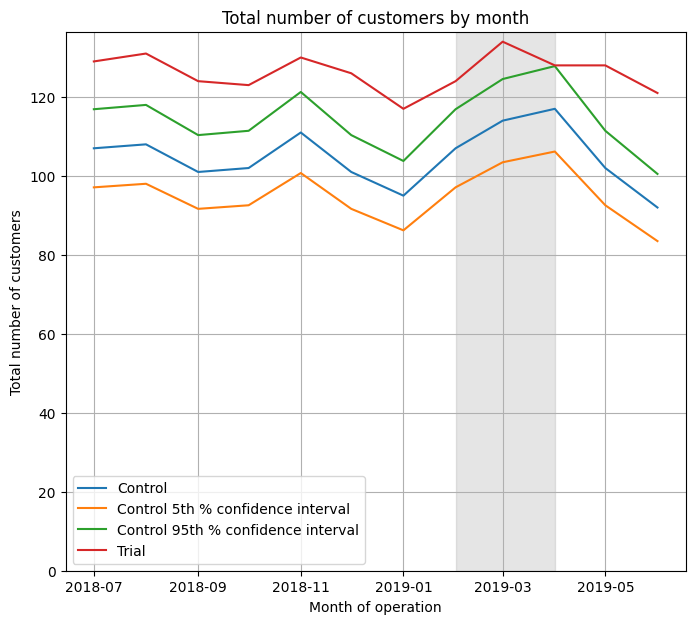

In [181]:
# Create a copy of measureOverTime for sales visualization
measureOverTimeCustomers_88 = measureOverTime.copy()

# Create a new column 'Store_type' based on trial and control store
measureOverTimeCustomers_88['Store_type'] = np.where(measureOverTimeCustomers_88['STORE_NBR'] == trial_store, 'Trial',
                                    np.where(measureOverTimeCustomers_88['STORE_NBR'] == control_store_88, 'Control', 'Other stores'))

# Calculate mean total sales by YearMonth and Store_type
pastCustomers_88 = measureOverTimeCustomers_88.groupby(['YEARMONTH', 'Store_type']).agg({'nCustomers': 'mean'}).reset_index()

# Convert YEARMONTH to TransactionMonth
pastCustomers_88['TransactionMonth'] = pd.to_datetime(pastCustomers_88['YEARMONTH'].astype(str), format='%Y%m')

# Filter data for Trial and Control stores
pastCustomers_88 = pastCustomers_88[pastCustomers_88['Store_type'].isin(['Trial', 'Control'])]

# Create confidence interval bounds for Control stores
pastCustomers_Controls95_88 = pastCustomers_88[pastCustomers_88['Store_type'] == 'Control'].copy()
pastCustomers_Controls95_88['nCustomers'] = pastCustomers_Controls95_88['nCustomers'] * (1 + stdDev * 2)
pastCustomers_Controls95_88['Store_type'] = 'Control 95th % confidence interval'

pastCustomers_Controls5_88 = pastCustomers_88[pastCustomers_88['Store_type'] == 'Control'].copy()
pastCustomers_Controls5_88['nCustomers'] = pastCustomers_Controls5_88['nCustomers'] * (1 - stdDev * 2)
pastCustomers_Controls5_88['Store_type'] = 'Control 5th % confidence interval'

# Combine assessment results
trialAssessmentCustomers_88 = pd.concat([pastCustomers_88, pastCustomers_Controls95_88, pastCustomers_Controls5_88], ignore_index=True)

# Filtering data for the geom_rect
filtered_data_Customers_88 = trialAssessmentCustomers_88[(trialAssessmentCustomers_88['YEARMONTH'] < 201905) & (trialAssessmentCustomers_88['YEARMONTH'] > 201901)]

plt.figure(figsize=(8, 7))  # Adjust the figure size if needed

# geom_rect
# Create rectangles for confidence intervals
plt.axvspan(
    filtered_data_Customers_88['TransactionMonth'].min(),filtered_data_Customers_88['TransactionMonth'].max(),
    ymin=0,ymax=1,color='gray', alpha=0.2,label=None)

# geom_line
for store_type, group in trialAssessmentCustomers_88.groupby('Store_type'):
    plt.plot(group['TransactionMonth'], group['nCustomers'], label=store_type)

# Adding labels and title
plt.xlabel("Month of operation")
plt.ylabel("Total number of customers")
plt.title("Total number of customers by month")
plt.legend()
plt.ylim(0)
plt.grid(True)

# Show the plot
plt.show()

